# imports

In [1]:
# system & general:
from os import listdir, mkdir, makedirs
from os.path import isfile, join, isdir, exists
import cPickle as pickle
import os
import re
import time

# data analysis and statistics:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import pearsonr, fisher_exact, mannwhitneyu, sem
import math
from scipy.spatial.distance import braycurtis, pdist, euclidean

# figures:
import matplotlib as mpl
# mpl.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
# from PNPChip.ForPaper.Figures.nature_guidline_utils import m2inch
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# my functions:
from ShaniBA.myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot, adjusted_roundup
from ShaniBA.MyFunctionsShani import *
from ShaniBA.GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from ShaniBA.SampleLists.SampleFileFunctions import *
from ShaniBA.PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from ShaniBA.PredictionPipeline.PredictionFunctions import *
from ShaniBA.TCR_feature_generation.SubsamplingFunctions import *
from ShaniBA.CardioProject.Figures.GeneralFigureFunctions import *
from ShaniBA.CardioProject.Figures.Figure1 import *

#ML:
from sklearn.linear_model import LogisticRegression, LinearRegression


stop
done1
stop
done
done
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Definitions

In [2]:
#####path definitions:
MyPath = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530', 'rb') as fp:
    PNP530 = pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126', 'rb') as fp:
    Cardio126 = pickle.load(fp)
PNP530Cardio126 = PNP530 + Cardio126

FIG4_DIR = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/\
Fig4_clinicalPhens/'
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
FEATURES_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/'
SAMPLE_LIST_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/'
CARDIO_PHEN_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/'
CLUSTER_ANALYSIS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'

##### general definitions:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=4, linewidth=200)

cdate = str(time.strftime("%d%m%Y"))
cdate

'31032019'

In [3]:
PRED_RESULTS_DIR

'/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'

# general functions:

the function remove_spines was copied to GenderalFigureFunctions.py

# general settings

## figure definitions

In [4]:
def set_fig4_definitions():
    params = {
   'axes.labelsize': 16,
   'font.size': 12,
   'legend.fontsize': 14,
    'axes.titlesize':16,
    'axes.titleweight':'bold',
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
#    'figure.figsize': [m2inch(183), m2inch(247)],#[4.5, 4.5]
#    'figure.dpi': 300,
   'xtick.direction':'out'}


    mpl.rcParams.update(params)
    mpl.rcParams['axes.linewidth'] = 0.5
    mpl.rcParams['axes.edgecolor'] = 'black'
    mpl.rcParams['axes.facecolor'] = 'white'
    mpl.rcParams['xtick.direction'] = 'out'
    mpl.rcParams['xtick.minor.pad'] = 4

    return

In [5]:
mpl.rcParams.keys()

[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
 u'axes.xmargin',
 u'axes.ymargin',
 u'axes3d.grid',
 u'backend',
 u'backend.qt4',
 u'backend.qt5',
 u'backend_fallback',
 u'boxplot.bootstrap',
 u'boxplot.boxprops.color',
 u'boxplot.boxprops.linestyle',
 u'boxplot.boxprops.linewidth',
 u'boxplot.capprops.color',
 u'boxplot.capprops.linestyle',
 u'boxplot.capprops.linewidth',
 u'boxplot.flierprops.color',
 u'boxplot.flierprops.linestyle',
 u'boxplot.flierprops.linewidth',
 u'boxplot.flierprops.marker',
 u'boxplot.flierprops.markeredgecolor',
 u'boxplot.flierprops.markerfacecolor',
 u'boxplot.flierprops.markersize',
 u'boxplot.meanline',
 u'boxplot.meanprops.color',
 u'boxplot.meanprops.linestyle',
 u'boxplot.meanprops.linewidth',
 u'boxplot.medianprops.color',
 u'boxplot.medianprops.linestyle',
 u'boxplot.medianprops.linewidth',
 u'boxplot.notch',
 u'boxplot.patchartist',
 u'boxplot.showbox',
 u'boxplot.showcaps',
 u'boxplot.showfliers',
 u'boxplot.showmeans',
 u'boxplot.vertical',
 u'boxplot.whiskerprops.color',
 u'boxplot.whiskerprops.linestyle',
 u'boxplot.whiskerprops.linewidth',
 u'boxplot.whiskers',
 u'contour.corner_mask',
 u'contour.negative_linestyle',
 u'datapath',
 u'docstring.hardcopy',
 u'errorbar.capsize',
 u'examples.directory',
 u'figure.autolayout',
 u'figure.dpi',
 u'figure.edgecolor',
 u'figure.facecolor',
 u'figure.figsize',
 u'figure.frameon',
 u'figure.max_open_warning',
 u'figure.subplot.bottom',
 u'figure.subplot.hspace',
 u'figure.subplot.left',
 u'figure.subplot.right',
 u'figure.subplot.top',
 u'figure.subplot.wspace',
 u'figure.titlesize',
 u'figure.titleweight',
 u'font.cursive',
 u'font.family',
 u'font.fantasy',
 u'font.monospace',
 u'font.sans-serif',
 u'font.serif',
 u'font.size',
 u'font.stretch',
 u'font.style',
 u'font.variant',
 u'font.weight',
 u'grid.alpha',
 u'grid.color',
 u'grid.linestyle',
 u'grid.linewidth',
 u'image.aspect',
 u'image.cmap',
 u'image.composite_image',
 u'image.interpolation',
 u'image.lut',
 u'image.origin',
 u'image.resample',
 u'interactive',
 u'keymap.all_axes',
 u'keymap.back',
 u'keymap.forward',
 u'keymap.fullscreen',
 u'keymap.grid',
 u'keymap.home',
 u'keymap.pan',
 u'keymap.quit',
 u'keymap.save',
 u'keymap.xscale',
 u'keymap.yscale',
 u'keymap.zoom',
 u'legend.borderaxespad',
 u'legend.borderpad',
 u'legend.columnspacing',
 u'legend.edgecolor',
 u'legend.facecolor',
 u'legend.fancybox',
 u'legend.fontsize',
 u'legend.framealpha',
 u'legend.frameon',
 u'legend.handleheight',
 u'legend.handlelength',
 u'legend.handletextpad',
 u'legend.isaxes',
 u'legend.labelspacing',
 u'legend.loc',
 u'legend.markerscale',
 u'legend.numpoints',
 u'legend.scatterpoints',
 u'legend.shadow',
 u'lines.antialiased',
 u'lines.color',
 u'lines.dash_capstyle',
 u'lines.dash_joinstyle',
 u'lines.linestyle',
 u'lines.linewidth',
 u'lines.marker',
 u'lines.markeredgewidth',
 u'lines.markersize',
 u'lines.solid_capstyle',
 u'lines.solid_joinstyle',
 u'markers.fillstyle',
 u'mathtext.bf',
 u'mathtext.cal',
 u'mathtext.default',
 u'mathtext.fallback_to_cm',
 u'mathtext.fontset',
 u'mathtext.it',
 u'mathtext.rm',
 u'mathtext.sf',
 u'mathtext.tt',
 u'nbagg.transpar

In [6]:
set_fig4_definitions()

## figure design

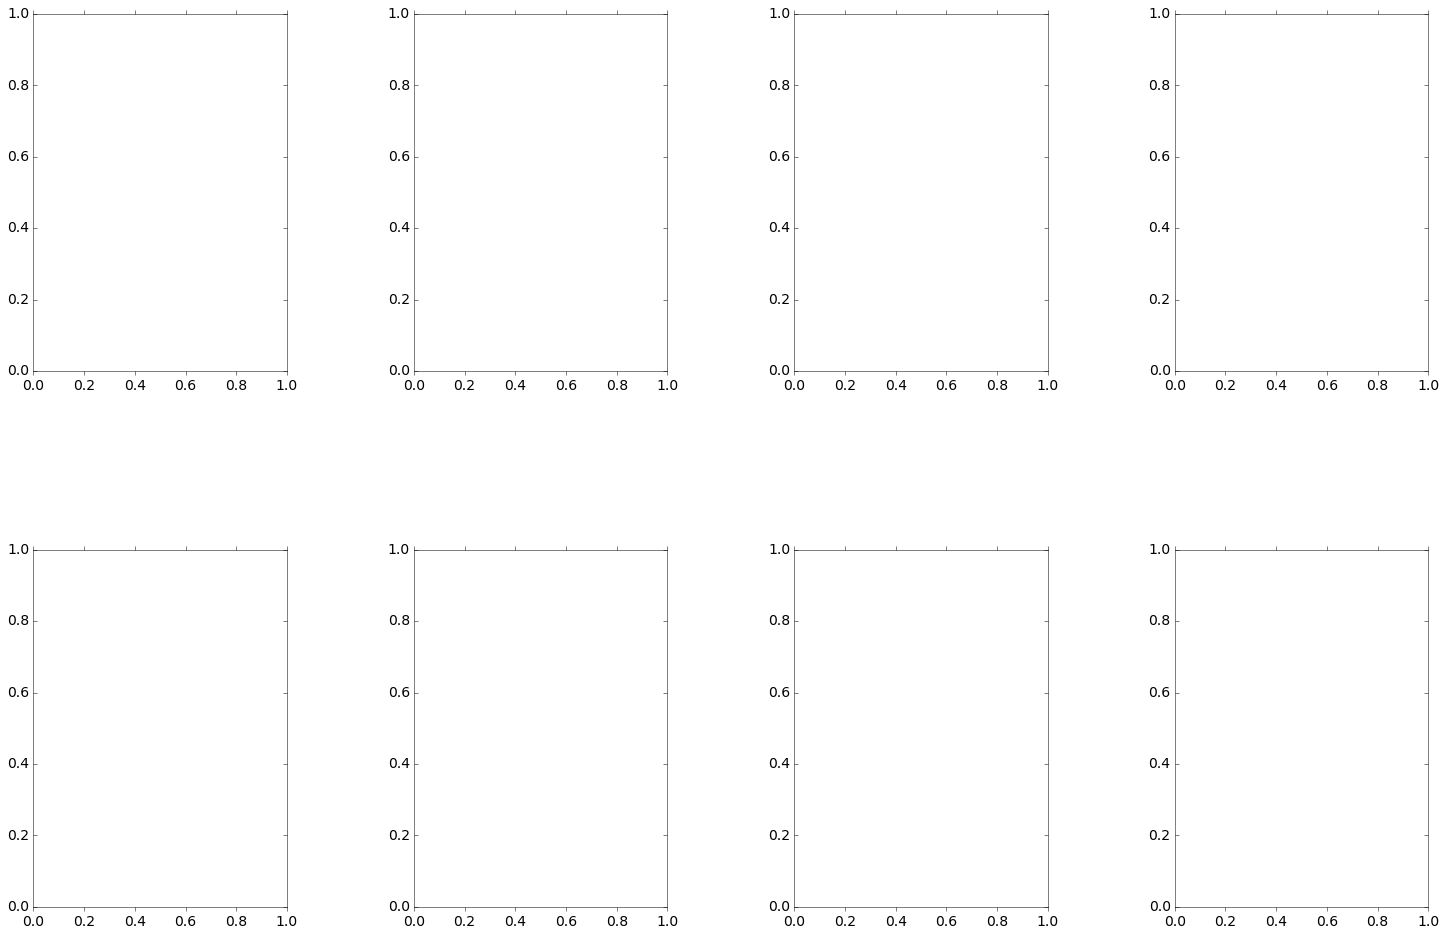

In [7]:
fig = plt.figure(figsize=(25, 16))
gs0 = gridspec.GridSpec(2, 4, wspace=0.5, hspace=0.5)

### A:
ax1 = plt.Subplot(fig, gs0[0, 0])
fig.add_subplot(ax1)

ax2 = plt.Subplot(fig, gs0[0, 1])
fig.add_subplot(ax2)

ax3 = plt.Subplot(fig, gs0[0, 2])
fig.add_subplot(ax3)

ax4 = plt.Subplot(fig, gs0[0, 3])
fig.add_subplot(ax4)

### B:
ax5 = plt.Subplot(fig, gs0[1, 0])
fig.add_subplot(ax5)

ax6 = plt.Subplot(fig, gs0[1, 1])
fig.add_subplot(ax6)

ax7 = plt.Subplot(fig, gs0[1, 2])
fig.add_subplot(ax7)

ax8 = plt.Subplot(fig, gs0[1, 3])
fig.add_subplot(ax8)


plt.show()

# plot functions

1. copy ROC+PR plotting function from fig1 and modify
2. copy shap plot from fig2 and modify

## fig 4a: roc+PR curve for clinical phenotype prediction:

first 3 columns: auc, last column-correlation

In [8]:
def plot_phen_prediction_ROC_PR(ax,phen,pred_dir,pVal):
    
    #get pred_proba data for phenotype
    dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
    phen_pred_proba = pd.read_pickle(dir2 + 'predictions_df.pkl').astype('float').rename(columns={phen:'pred_proba'})
#     print 'phen_pred_proba.columns:'
#     print phen_pred_proba.columns
    phen_pred_proba=pd.DataFrame(phen_pred_proba['pred_proba'])
#     print phen_pred_proba.head()
    
    # get phenotype data
    phen_file = CARDIO_PHEN_DIR+phen.replace(' ','')+'.xlsx'
    phenDF = pd.read_excel(phen_file).set_index('BD').astype('float')

    merged = pd.merge(phenDF, phen_pred_proba, how='inner', left_index=True, right_index=True)

#     print 'merged'
#     print merged.head()

    # #plot:
    pos_label = 1
    ax, inset_axes,roc_auc, pr_auc, prevalence = plot_ROC_PR_AUC(y=pd.DataFrame(merged[phen.replace(' ','')]), y_pred_df=pd.DataFrame(merged['pred_proba']),
                                    ax=ax, color1='darkred', color2='grey', ticklabelsize=mpl.rcParams['xtick.labelsize'],
                                      textsize=mpl.rcParams['font.size'], labelsize=mpl.rcParams['axes.labelsize'], add_texts=False)
    ax.annotate('ROC AUC=%s\nObserved p=%s\nPR AUC=%s' % (round(roc_auc, 3), pVal, round(pr_auc, 2)), xy=(0.04, 0.98), xycoords='axes fraction',
                 fontsize=mpl.rcParams['font.size'], xytext=(0, 0), textcoords='offset points', fontweight='bold', ha='left', va='top')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    inset_axes.text(0.01,prevalence-0.01,'Prevalence=%s' %prevalence,transform=inset_axes.transAxes,ha='left',va='top',
                    fontsize=mpl.rcParams['font.size']-2)
    
    return ax


def plot_phen_prediction_correlation(ax,phen,pred_dir,outlierSTD=None,toAnnotate=True):
    
    #### this function can be converted to more modular function to plot phenotype prediction correlation###
    # get phenotype data
    phen_file = CARDIO_PHEN_DIR+phen.replace(' ','')+'.xlsx'
    phenDF = pd.read_excel(phen_file).set_index('BD').astype('float')

    dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
    phen_pred = pd.read_pickle(dir2 + 'predictions_df.pkl').astype('float')


    phen_real = phenDF[phenDF[phen.replace(' ','')].notnull()][phen.replace(' ','')].rename('Real').astype('float')
    phen_pred = phen_pred[phen].rename('Predicted').astype('float')
    merged = pd.merge(pd.DataFrame(phen_real), pd.DataFrame(phen_pred), how='inner', left_index=True, right_index=True)
    # print merged.head()

    # # plot data:
    x = 'Real'; y = 'Predicted'
    if outlierSTD is not None:
        x_lim1=merged[x].mean()-outlierSTD * merged[x].std()
        x_lim2=merged[x].mean()+outlierSTD * merged[x].std()
        print ('value limits are: ',x_lim1,x_lim2)
        print ('merged.shape before outlier removal= ',merged.shape)
        merged=merged[(merged[x]>x_lim1) & (merged[x]<x_lim2)]
        print ('merged.shape after outlier removal= ',merged.shape)
        
    merged.plot(x, y, ax=ax, kind='scatter', alpha=0.5, c='darkred', s=60)
    ax.plot(np.unique(merged[x]), np.poly1d(np.polyfit(merged[x], merged[y], 1))(np.unique(merged[x])), c='black', linewidth=1)
    r, p = MyPearsonr(merged[x], merged[y])
    print r, p
    if toAnnotate:
        ax.annotate('r=%s\np=%.1E' % (round(r, 2), p), xy=(0.04, 0.98), xycoords='axes fraction', fontsize=mpl.rcParams['font.size'],
                        xytext=(0, 0), textcoords='offset points', fontweight='bold',
                        ha='left', va='top')   
    return ax,r,p


def plot_4a(subplot_list,ax1,ax2,ax3,ax4):
    
    ### plot ROC+PR CURVES:
    print 'plotting ROC-PR / correlation curves...'
    for n,item in enumerate(subplot_list):
        ax_4a=item[0]; ax_4b=item[1]; phen=item[2]; phen_niceName=item[3]; pred_dir=item[4]; pVal=item[5]
        print ('phen_niceName=', phen_niceName)
        if n!=3:
            print item[1]
            ax=plot_phen_prediction_ROC_PR(ax=ax_4a,phen=phen,pred_dir=pred_dir,pVal=pVal)
            if ax_4a==ax1: ax_4a.set_ylabel('True Positive Rate')
            else: ax_4a.set_ylabel('')
    
        else:
             ### PLOT CORRELATION CURVE:
            ax_4a,r,p=plot_phen_prediction_correlation(ax_4a,phen,pred_dir,outlierSTD=None,toAnnotate=False)
            ax_4a.set_xlim(0, 16000)
            ax_4a.set_ylim(0, 16000)
            ticks = [4000, 8000, 12000, 16000]
            ax_4a.set_xticks(ticks); ax_4a.set_yticks(ticks) 
            ax_4a.annotate('Pearson r=%s\nObserved p=%s' %(round(r, 2), pVal), xy=(0.04, 0.98),xycoords='axes fraction',
                         fontsize=mpl.rcParams['font.size'], xytext=(0, 0), textcoords='offset points', fontweight='bold', ha='left', va='top')   
        
        
        ax_4a.set_title(phen_niceName,fontsize='xx-large', y=1.05)
        
        
    return ax1,ax2,ax3,ax4

## fig 4b: shap graphs:

In [9]:
def plot4b(subplot_list,fig,ax5,ax6,ax7,ax8):
    
    print 'plotting shap plots...'
        
    Xfeatures_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/X_Cardio126.dat'
    Xfeatures = pd.read_pickle(Xfeatures_file)
    for col in Xfeatures.columns:
            Xfeatures[col] = Xfeatures[col].fillna(Xfeatures[col].median())
            
    #define parameters for shap plot:
    nTopFeatures = 10
    features_df = Xfeatures
    jitter = 0.1
    sample_num = None
    scalingMethod = 'perc'
    alpha=1
    

    # ## plot ax4:
    mpl.rcParams['ytick.labelsize']=14
    mpl.rcParams['axes.labelsize']=16
        
    ###plot shap plot for each phenotype:
    for item in subplot_list:
        ax_4b=item[1]; phen=item[2]; phen_niceName=item[3]; pred_dir=item[4]; isShap=item[6]
        print '*********'+phen+'*****************'
    
        # load shap/coef values:
        dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
        if isShap:
            pred_shap = pd.read_pickle(dir2 + 'shap_values.pkl')[phen].astype('float').rename(columns={phen:'shap'})
            shap_df = pd.DataFrame(pred_shap)
#             print shap_df
            print ('shap_df.shape: ',shap_df.shape)
            target_name = phen
            if ax_4b==ax8: addColorBar=True
            else: addColorBar=False

            ax_4b, fig = gen_shap_summary_to_axes(ax_4b, fig, target_name, nTopFeatures, shap_df, features_df,
                                               jitter=jitter, sample_num=sample_num, scalingMethod=scalingMethod,
                                              addColorBar=addColorBar,alpha=alpha)
#             ax_4b.set_ylim(-1,1)
        else:
            pred_coef=pd.read_pickle(dir2 + 'coef_values.pkl')[phen].astype('float').rename(columns={phen:'coef'})
            print 
            coef_df = pd.DataFrame(pred_coef)
#             print coef_df.fillna(0).max()
            target_name = phen
    
    
        ###some more edits:
        if ax_4b==ax5: ax_4b.set_ylabel('Shap Value')
        else: ax_4b.set_ylabel('')
        plt.setp(ax_4b.get_xticklabels(), rotation=90, ha="left",
         rotation_mode="anchor", fontsize=mpl.rcParams['font.size'], fontweight='bold')
    

            
    return fig,ax5,ax6,ax7,ax8

In [10]:
def plot_fig4(fig,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8):
    subplot_list=[(ax1,ax5,'OstialDiseaseCorrect_binary','Is Ostial Disease',
                   'OstialDiseaseCorrect_binary_XGB50_randomSearch_25_byXCardio126_optByAUC/',0.0005,True),
                 (ax2,ax6,'nVessles_disease_binary','# Vessles Involved',
                  'nVessles_disease_binary_XGB200_randomSearch_25_byXCardio126_optByAUC/',0.008,True),
                 (ax3,ax7,'Admission Diagnosis mapped_STEMI','Is STEMI',
                  'XGB_randomSearch_25_byRepFeatPCA10percVDJ0999PredictedAgeGender_kappa/',0.008,True),
                 (ax4,ax8,'Maximal Troponin','Maximal Troponin',
                  'XGBreg20LOO_randomSearch_25_byRepFeatPCA10percVDJ0999PredictedAgeGender_expVar/',0.0005,True)]
    
    ax1,ax2,ax3,ax_4=plot_4a(subplot_list,ax1,ax2,ax3,ax4)
    fig,ax5,ax6,ax7,ax8=plot4b(subplot_list,fig,ax5,ax6,ax7,ax8)
    
    return fig,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8
    
    
    
    

## run within figure:

plotting ROC-PR / correlation curves...
('phen_niceName=', 'Is Ostial Disease')
Axes(0.125,0.125;0.163158x0.336957)
('phen_niceName=', '# Vessles Involved')
Axes(0.328947,0.125;0.163158x0.336957)
('phen_niceName=', 'Is STEMI')
Axes(0.532895,0.125;0.163158x0.336957)
('phen_niceName=', 'Maximal Troponin')
0.3586546694699669 5.356797000091051e-05
plotting shap plots...
*********OstialDiseaseCorrect_binary*****************
('shap_df.shape: ', (126, 17))
['V25_J02_0', 'V07-08_1', 'n1Insertion_mean_0', 'V07-07_0', 'V06-07_0', 'V09_J01_0', 'V19-01_1', 'V14_J01_0', u'EBV_rel_cum_freq(perc)', 'cdr3Length_mean_1']
['V25 j02(non prod)', 'V07 08', 'N1 insertion mean(non prod)', 'V07 07(non prod)', 'V06 07(non prod)', 'V09 j01(non prod)', 'V19 01', 'V14 j01(non prod)', u'Ebv seq freq.', 'Cdr3 length mean']
('sample_num= ', 126)
('features_df_topN.shape=', (126, 10))
('features_df_topN_scaled.shape=', (126, 10))
('features_df_topN_scaled_long.shape=', (1260, 3))
('shap_df_topN.shape=', (126, 10))
('

Finished figure 4!!


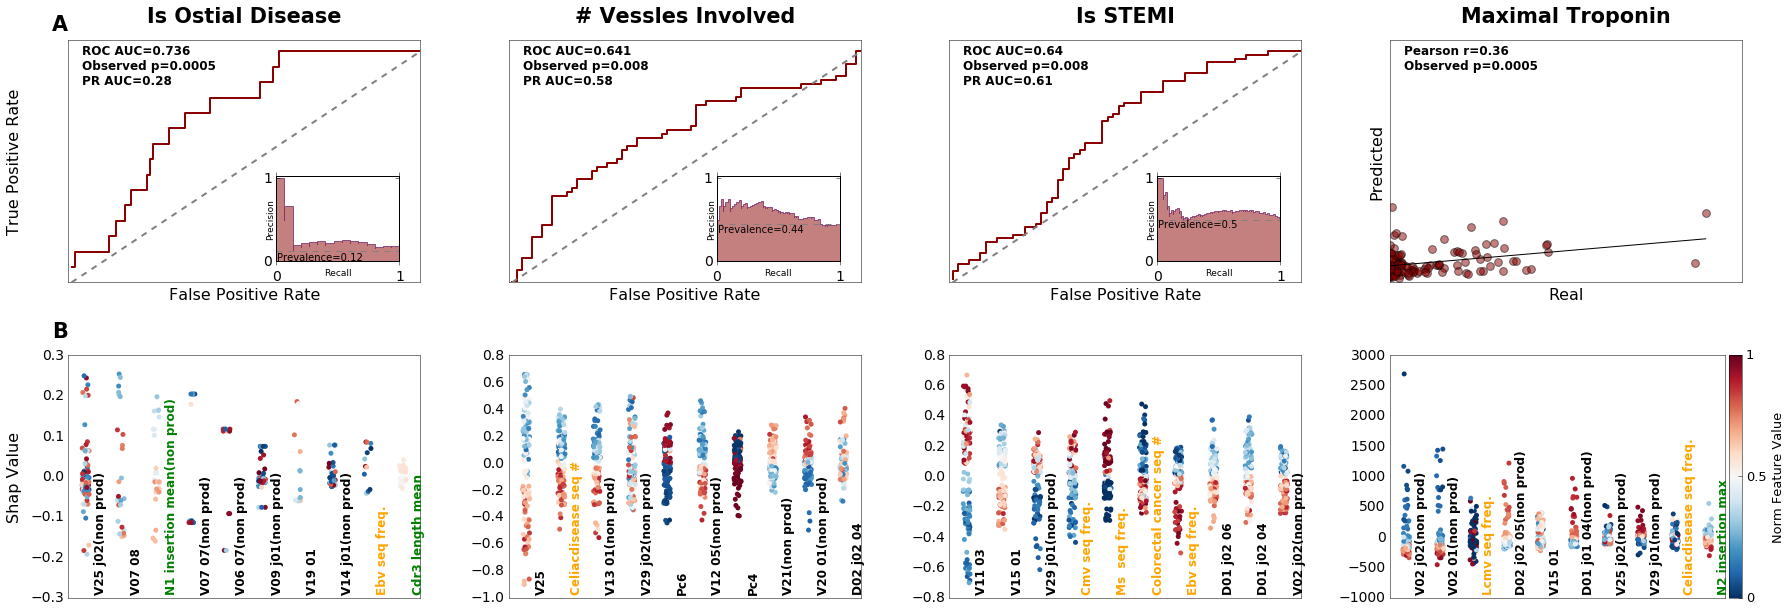

In [11]:
fig = plt.figure(figsize=(30, 10))
gs0 = gridspec.GridSpec(2, 4, wspace=0.25, hspace=0.3)

#add sub-figure letters and remove spines:
ax = plt.gca()
plt.text(0,1.01,'A',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
plt.text(0,0.46,'B',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
remove_spines(removeFigBorders=True)

### A:
ax1 = plt.Subplot(fig, gs0[0, 0])
fig.add_subplot(ax1)

ax2 = plt.Subplot(fig, gs0[0, 1])
fig.add_subplot(ax2)

ax3 = plt.Subplot(fig, gs0[0, 2])
fig.add_subplot(ax3)

ax4 = plt.Subplot(fig, gs0[0, 3])
fig.add_subplot(ax4)

### B:
ax5 = plt.Subplot(fig, gs0[1, 0])
fig.add_subplot(ax5)

ax6 = plt.Subplot(fig, gs0[1, 1])
fig.add_subplot(ax6)

ax7 = plt.Subplot(fig, gs0[1, 2])
fig.add_subplot(ax7)

ax8 = plt.Subplot(fig, gs0[1, 3])
fig.add_subplot(ax8)


fig,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8=plot_fig4(fig,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)
for ax in [ax1,ax2,ax3,ax4]:
    remove_spines(ax,removeTicklabels=True)
for ax in [ax5,ax6,ax7,ax8]:
     remove_spines(ax,removeTicklabels=False)
        
# fig.align_ylabels(axes=[ax_PCoA,ax_PCoA_dist])
ax1.yaxis.set_label_coords(-0.13, 0.5)
ax5.yaxis.set_label_coords(-0.13, 0.5)

fig.savefig(FIG4_DIR + 'figure4_%s.png' % cdate, dpi=300)

print 'Finished figure 4!!'


plt.show()

In [12]:
mpl.rcParams['ytick.labelsize']

14.0

#  copy all necessary functions to .py files! generate .py file for figure 4 and execute!!!!!

In [13]:
pred_dir_list=['']



dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
phen_pred = pd.read_pickle(dir2 + 'predictions_df.pkl').astype('float')

NameError: name 'pred_dir' is not defined